# Reading Tables From HTML Files.

While practicing a little of what I've been learning about pandas and matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-whitegrid')

sns.set()

%matplotlib inline 


In [6]:
# Save url into a variable
url = "https://en.wikipedia.org/wiki/World_population"

It took quite some time to read all the ``tables``.<br/>
> About *34s* the first time.

In [7]:
dfs = pd.read_html(url) # reads all tables in the html file into respective data frames.

In [8]:
len(dfs) # wow! 26 tables on this page.

26

I'll have a look through the first data frame.

In [9]:
df1 = dfs[0] # selecting the first dataframe.

In [10]:
df1.head() 

,#,Most populous countries,2000,2015,2030[A]
0,1,China[B],1270,1376,1416
1,2,India,1053,1311,1528
2,3,United States,283,322,356
3,4,Indonesia,212,258,295
4,5,Pakistan,136,208,245


In [11]:
df1.shape 
# its a small, simple table from wikipedia.

(12, 5)

In [12]:
df1.info()
# there are no null values in this data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        11 non-null     object
 1   Most populous countries  12 non-null     object
 2   2000                     12 non-null     object
 3   2015                     12 non-null     object
 4   2030[A]                  12 non-null     object
dtypes: object(5)
memory usage: 608.0+ bytes


In [13]:
df1

,#,Most populous countries,2000,2015,2030[A]
0,1,China[B],1270,1376,1416
1,2,India,1053,1311,1528
2,3,United States,283,322,356
3,4,Indonesia,212,258,295
4,5,Pakistan,136,208,245
5,6,Brazil,176,206,228
6,7,Nigeria,123,182,263
7,8,Bangladesh,131,161,186
8,9,Russia,146,146,149
9,10,Mexico,103,127,148


The last three columns have the `object` data type.<br/>
I'll need to convert them to `int` data types so I can work with them.

Time to perform some data cleaning.<br/>
Drop the first column

In [14]:
# Dropping the first column labelled '#'
df1.drop('#', axis=1, inplace=True)

In [15]:
df1 

,Most populous countries,2000,2015,2030[A]
0,China[B],1270,1376,1416
1,India,1053,1311,1528
2,United States,283,322,356
3,Indonesia,212,258,295
4,Pakistan,136,208,245
5,Brazil,176,206,228
6,Nigeria,123,182,263
7,Bangladesh,131,161,186
8,Russia,146,146,149
9,Mexico,103,127,148


Drop the last two rows 

In [16]:
df1.drop([10, 11], axis=0, inplace=True)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Most populous countries  10 non-null     object
 1   2000                     10 non-null     object
 2   2015                     10 non-null     object
 3   2030[A]                  10 non-null     object
dtypes: object(4)
memory usage: 400.0+ bytes


Time to change column names.

In [18]:
# Change column names 
columns = ['countries', '2000_pop', '2015_pop', '2030_pop']

In [19]:
df1.columns = columns # assign new column names 

In [20]:
df1

,countries,2000_pop,2015_pop,2030_pop
0,China[B],1270,1376,1416
1,India,1053,1311,1528
2,United States,283,322,356
3,Indonesia,212,258,295
4,Pakistan,136,208,245
5,Brazil,176,206,228
6,Nigeria,123,182,263
7,Bangladesh,131,161,186
8,Russia,146,146,149
9,Mexico,103,127,148


In [21]:
# Change 'China[B]' to 'China'
df1.countries.replace({'China[B]':'China'}, inplace=True)

Change the data type of the last three `columns` to _int_.<br/>
So I can make simple plots.

In [22]:
convert = {
    '2000_pop': int,
    '2015_pop': int,
    '2030_pop': int
}

df1 = df1.astype(convert)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   countries  10 non-null     object
 1   2000_pop   10 non-null     int32 
 2   2015_pop   10 non-null     int32 
 3   2030_pop   10 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 280.0+ bytes


### Visulizations With Matplotlib

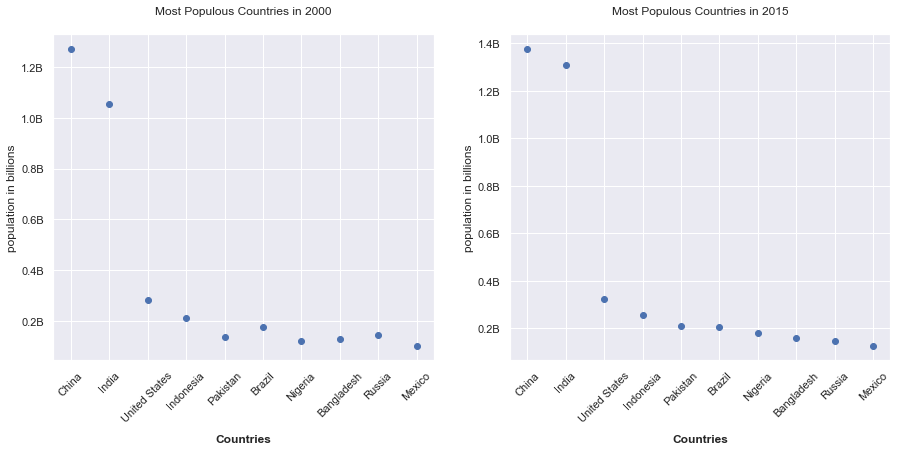

In [24]:
plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(df1.countries, df1['2000_pop'])
plt.title('Most Populous Countries in 2000', pad=20)
plt.xlabel('Countries', labelpad=10, fontdict={'fontweight': 'bold'})
plt.ylabel('population in billions')
plt.yticks([200, 400, 600, 800, 1000, 1200],
            ['0.2B', '0.4B', '0.6B', '0.8B', '1.0B', '1.2B'])
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
plt.scatter(df1.countries, df1['2015_pop'])
plt.title('Most Populous Countries in 2015', pad=20)
plt.xlabel('Countries', labelpad=10, fontdict={'fontweight': 'bold'})
plt.ylabel('population in billions')
plt.yticks([200, 400, 600, 800, 1000, 1200, 1400],
            ['0.2B', '0.4B', '0.6B', '0.8B', '1.0B', '1.2B', '1.4B'])
plt.xticks(rotation=45)
plt.show()

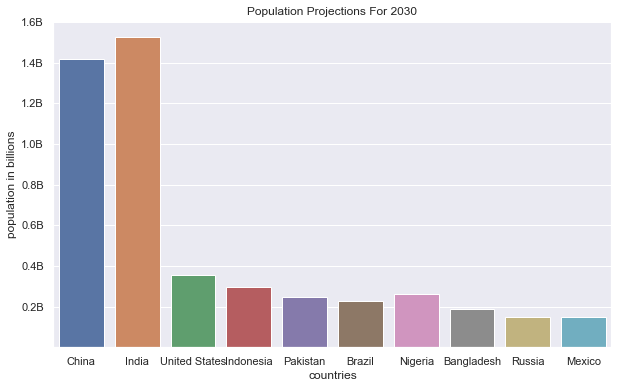

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x="countries", y="2030_pop", data=df1)
plt.title('Population Projections For 2030')
plt.ylabel('population in billions')

plt.yticks([200, 400, 600, 800, 1000, 1200, 1400, 1600],
            ['0.2B', '0.4B', '0.6B', '0.8B', '1.0B', '1.2B', '1.4B', '1.6B'])
plt.show()

India might be the most populous conutry in the world by `2030`